# Effective Volume

### In this notebook a preliminary effective volume will be determined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data

All the data forms with as a last digit a zero refer to a zenith angle of 0 degrees for all incoming events. Naturally this leads to more events being registered in the detector and thus a higher effective volume 

First import the data with the square configuration, so LocID = 2.

In [31]:
energy_2 = []
location_2 = []
flags_2 = []

with open('1000m_Square.txt', 'r') as file:
    lines = file.readlines()

# Assuming each entry spans 3 lines: a scalar, a vector, and a flag
for i in range(0, len(lines), 3):
    scalar = lines[i].strip()
    vector = lines[i + 1].strip()
    flag = lines[i + 2].strip()
    
    # Convert the scalar and flag to float and int, respectively
    # For the vector, strip the brackets, split by commas, and convert to floats
    scalar = float(scalar.strip('[]'))
    vector = [float(num) for num in vector.strip('[]').split(',')]
    flag = int(flag)
    
    # Append to their respective lists
    energy_2.append(scalar)
    location_2.append(vector)
    flags_2.append(flag)

print(f"From the 10000 simulated events a total of {np.sum(flags_2)} reached the detector and gave a signal.")

From the 10000 simulated events a total of 9249 reached the detector and gave a signal.
100000


Then import the data with the hexagonal configuration, so LocID = 3.

In [3]:
energy_3 = []
location_3 = []
flags_3 = []

with open('1000m_Hexagon.txt', 'r') as file:
    lines = file.readlines()

# Assuming each entry spans 3 lines: a scalar, a vector, and a flag
for i in range(0, len(lines), 3):
    scalar = lines[i].strip()
    vector = lines[i + 1].strip()
    flag = lines[i + 2].strip()
    
    # Convert the scalar and flag to float and int, respectively
    # For the vector, strip the brackets, split by commas, and convert to floats
    scalar = float(scalar.strip('[]'))
    vector = [float(num) for num in vector.strip('[]').split(',')]
    flag = int(flag)
    
    # Append to their respective lists
    energy_3.append(scalar)
    location_3.append(vector)
    flags_3.append(flag)

print(f"From the 10000 simulated events a total of {np.sum(flags_3)} reached the detector and gave a signal.")

From the 10000 simulated events a total of 8699 reached the detector and gave a signal.


Lastly import the data from the cylindrical detector, so LocID = 4. 

In [4]:
energy_4 = []
location_4 = []
flags_4 = []

with open('1000m_Cylinder.txt', 'r') as file:
    lines = file.readlines()

# Assuming each entry spans 3 lines: a scalar, a vector, and a flag
for i in range(0, len(lines), 3):
    scalar = lines[i].strip()
    vector = lines[i + 1].strip()
    flag = lines[i + 2].strip()
    
    # Convert the scalar and flag to float and int, respectively
    # For the vector, strip the brackets, split by commas, and convert to floats
    scalar = float(scalar.strip('[]'))
    vector = [float(num) for num in vector.strip('[]').split(',')]
    flag = int(flag)
    
    # Append to their respective lists
    energy_4.append(scalar)
    location_4.append(vector)
    flags_4.append(flag)

print(f"From the 10000 simulated events a total of {np.sum(flags_4)} reached the detector and gave a signal.")

From the 10000 simulated events a total of 9183 reached the detector and gave a signal.


## Square Detector

[2063 1997 1974 1985 2018 2112 1922 1994 2018 2071 1965 1952 2018 2062
 1994 1908 1918 1959 1988 1977 1977 1969 2067 2010 1995 1996 2020 2010
 2044 2015 1985 1997 2014 2044 1984 2033 2052 2033 1975 2037 1914 2042
 1872 2037 2082 1959 2046 1948 1936 2012]


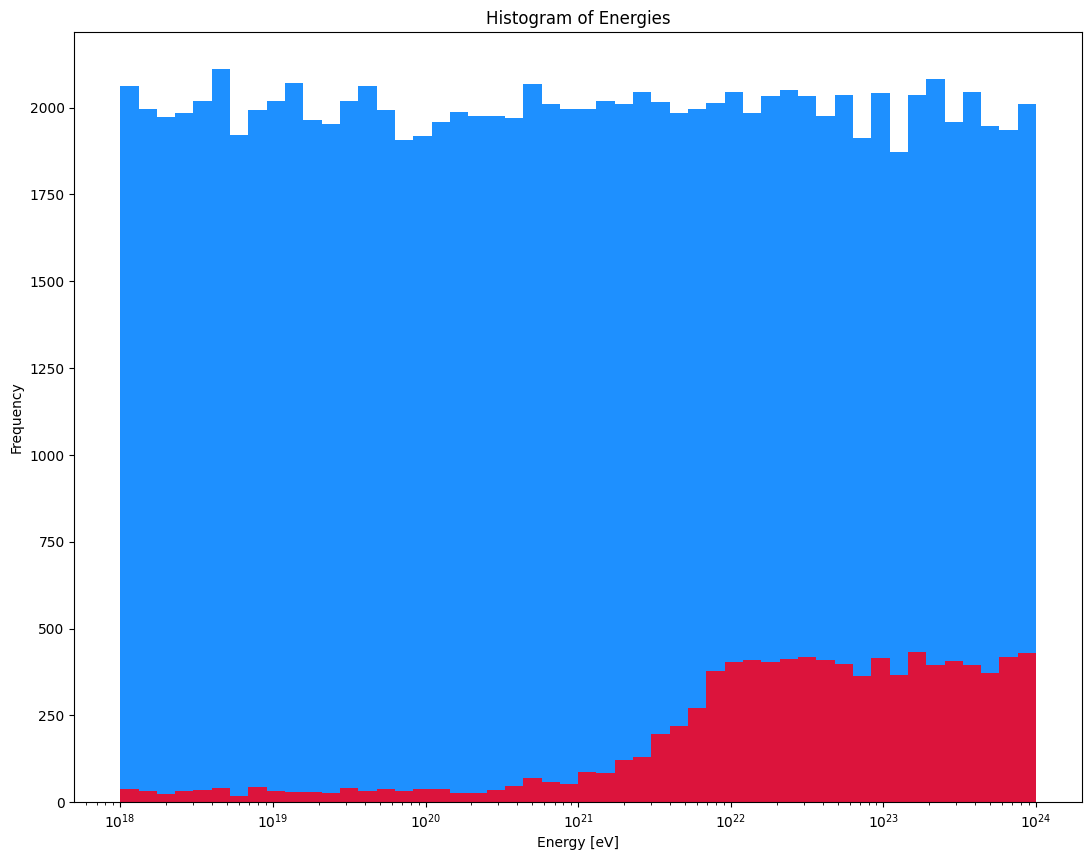

The volume of the can volume is 400 km3.


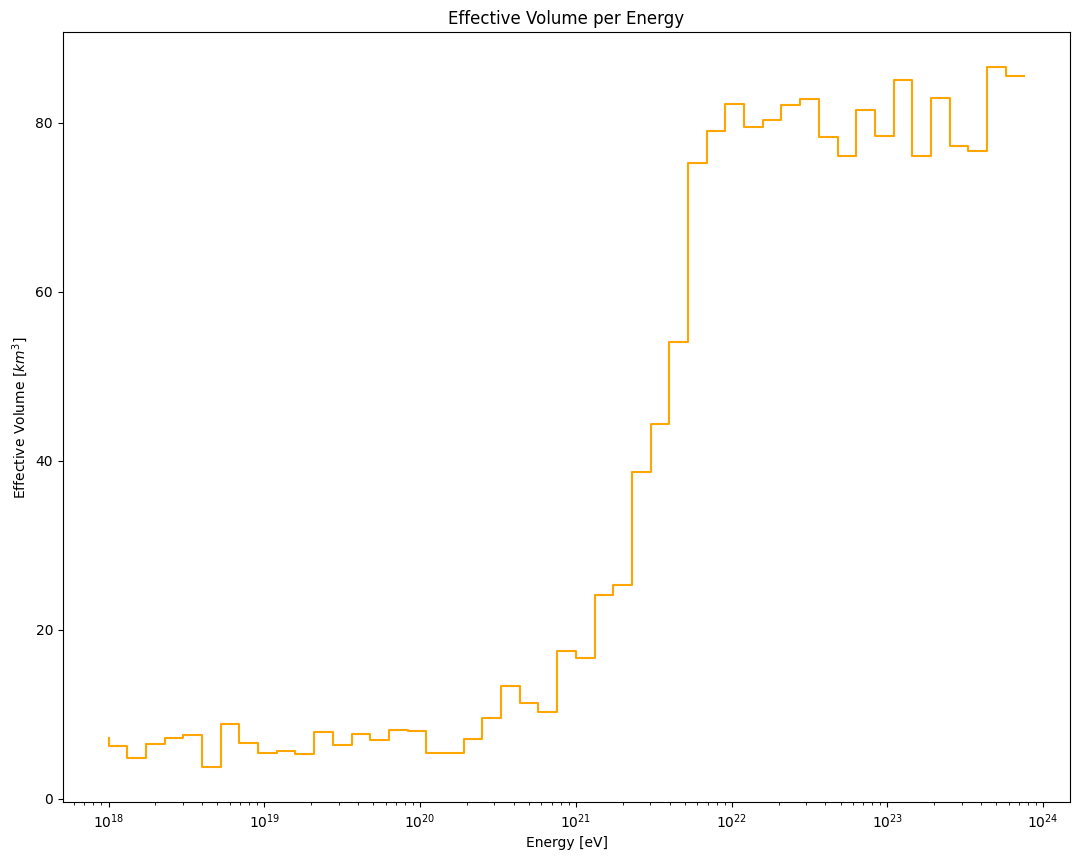

[1.00000000e+18 1.31825674e+18 1.73780083e+18 2.29086765e+18
 3.01995172e+18 3.98107171e+18 5.24807460e+18 6.91830971e+18
 9.12010839e+18 1.20226443e+19 1.58489319e+19 2.08929613e+19
 2.75422870e+19 3.63078055e+19 4.78630092e+19 6.30957344e+19
 8.31763771e+19 1.09647820e+20 1.44543977e+20 1.90546072e+20
 2.51188643e+20 3.31131121e+20 4.36515832e+20 5.75439937e+20
 7.58577575e+20 1.00000000e+21 1.31825674e+21 1.73780083e+21
 2.29086765e+21 3.01995172e+21 3.98107171e+21 5.24807460e+21
 6.91830971e+21 9.12010839e+21 1.20226443e+22 1.58489319e+22
 2.08929613e+22 2.75422870e+22 3.63078055e+22 4.78630092e+22
 6.30957344e+22 8.31763771e+22 1.09647820e+23 1.44543977e+23
 1.90546072e+23 2.51188643e+23 3.31131121e+23 4.36515832e+23
 5.75439937e+23 7.58577575e+23 1.00000000e+24]
[ 7.17401842  6.20931397  4.86322188  6.44836272  7.135778    7.57575758
  3.74609781  8.82647944  6.54112983  5.40801545  5.69974555  5.32786885
  7.92864222  6.40155189  7.62286861  6.91823899  8.13347237  7.96324655
  

In [30]:
log_min_energy = 18
log_max_energy = 24

# Filter out the energy values that have been detected so have flag ==1
detected_energy_2 = [energy for energy, flag in zip(energy_2, flags_2) if flag == 1]

# Define the bin edges equally spaced in log space
log_bin_edges = np.linspace(log_min_energy, log_max_energy, 51)

# Transform the bin edges back to linear scale
linear_bin_edges = 10**log_bin_edges

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(energy_2, bins=linear_bin_edges, color='dodgerblue')
plt.hist(detected_energy_2, bins=linear_bin_edges, color='crimson')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()

###################################### Now try to calculate the effective volume ###############################################

# Calculate the histograms using numpy.histogram
hist_all_2, _ = np.histogram(energy_2, bins=linear_bin_edges)
hist_detected_2, _ = np.histogram(detected_energy_2, bins=linear_bin_edges)

# Ensure you avoid division by zero
division_result_2 = np.divide(hist_detected_2, hist_all_2, where=hist_all_2!=0)

# Calculate the generation volume which is a square
Rgen = 10                          # km
Hgen = 1                           # km
Vgen = (2 * Rgen)**2 * Hgen
print(f"The volume of the can volume is {round(Vgen)} km3.")

# Calculate the effective volume
Veff_2 = division_result_2 * Vgen

# Plot the Veff
plt.figure(figsize=(13, 10))
plt.step(linear_bin_edges[:-1], Veff_2, linestyle='-', color='orange')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Effective Volume [$km^3$]')
plt.title('Effective Volume per Energy')
plt.show()

print(linear_bin_edges)
print(Veff_2)

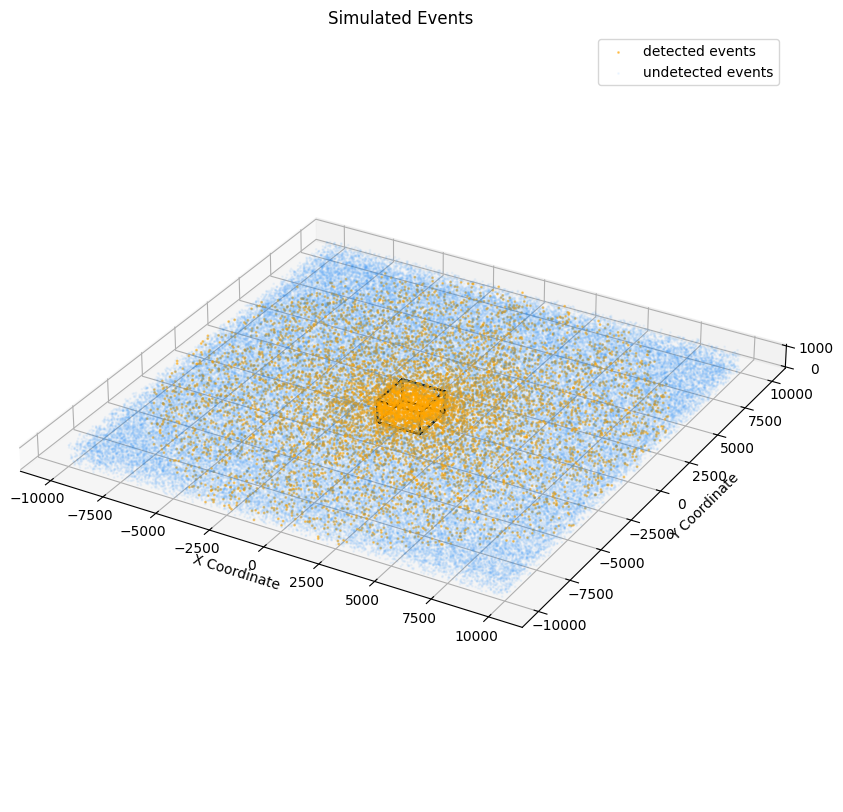

In [20]:
# Create a cube centered at the origin with side length 2
side_length = 2000
cube_coords = np.array([[1, 1, 1],
                        [1, 1, 0],
                        [1, -1, 1],
                        [1, -1, 0],
                        [-1, 1, 1],
                        [-1, 1, 0],
                        [-1, -1, 1],
                        [-1, -1, 0]]) * side_length / 2

# Define the vertices of the cube
cube_vertices = [
    [cube_coords[0], cube_coords[1], cube_coords[3], cube_coords[2], cube_coords[0]],
    [cube_coords[4], cube_coords[5], cube_coords[7], cube_coords[6], cube_coords[4]],
    [cube_coords[0], cube_coords[1], cube_coords[5], cube_coords[4], cube_coords[0]],
    [cube_coords[2], cube_coords[3], cube_coords[7], cube_coords[6], cube_coords[2]],
    [cube_coords[1], cube_coords[3], cube_coords[7], cube_coords[5], cube_coords[1]],
    [cube_coords[0], cube_coords[2], cube_coords[6], cube_coords[4], cube_coords[0]]
]

# Convert cube vertices to numpy array
cube_vertices = np.array(cube_vertices)


# Plot the location of the events
# Unzip the location_2 list into three lists for x, y, and z coordinates
detected_location_2 = [location for location, flag in zip(location_2, flags_2) if flag == 1]
undetected_location_2 = [location for location, flag in zip(location_2, flags_2) if flag == 0]

x_coords, y_coords, z_coords = zip(*detected_location_2)
z_coords = [i + 500 for i in z_coords]
unx_coords, uny_coords, unz_coords = zip(*undetected_location_2)
unz_coords = [i + 500 for i in unz_coords]

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
  
# Scatter plot for 3D data
sc = ax.scatter(x_coords, y_coords, z_coords, s=1, alpha=0.5, color='orange', label='detected events')
sc1 = ax.scatter(unx_coords, uny_coords, unz_coords, s=1, alpha=0.05, color='dodgerblue', label='undetected events')

# Plot the cube
for vertices in cube_vertices:
    ax.plot(vertices[:,0], vertices[:,1], vertices[:,2], color='black')
    
# Set labels for axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
#ax.set_zlabel('Z Coordinate')
ax.set_ylim(-10800, 10800)
ax.set_box_aspect([20,20,1])
ax.set_zticks([0, 1000])

# Title for your plot
plt.title('Simulated Events')
plt.legend()

# Show plot
plt.show()

## Hexagonal Detector

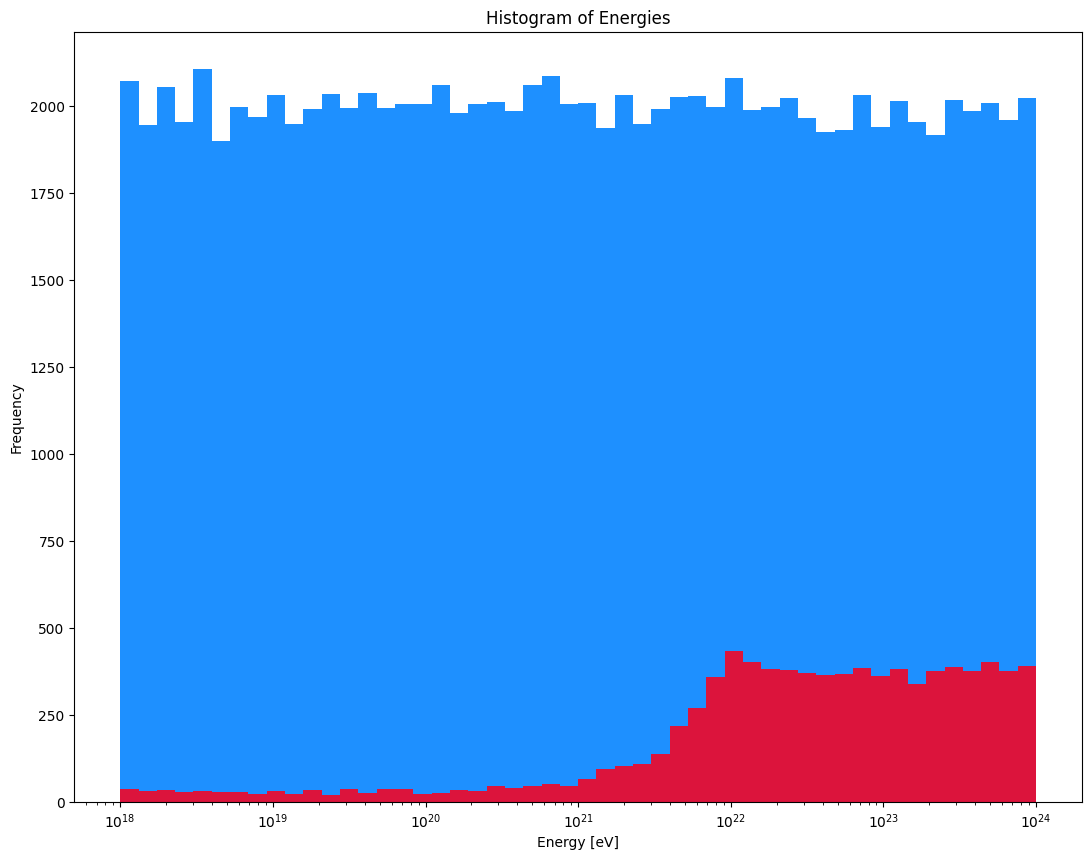

The volume of the can volume is 400 km3.


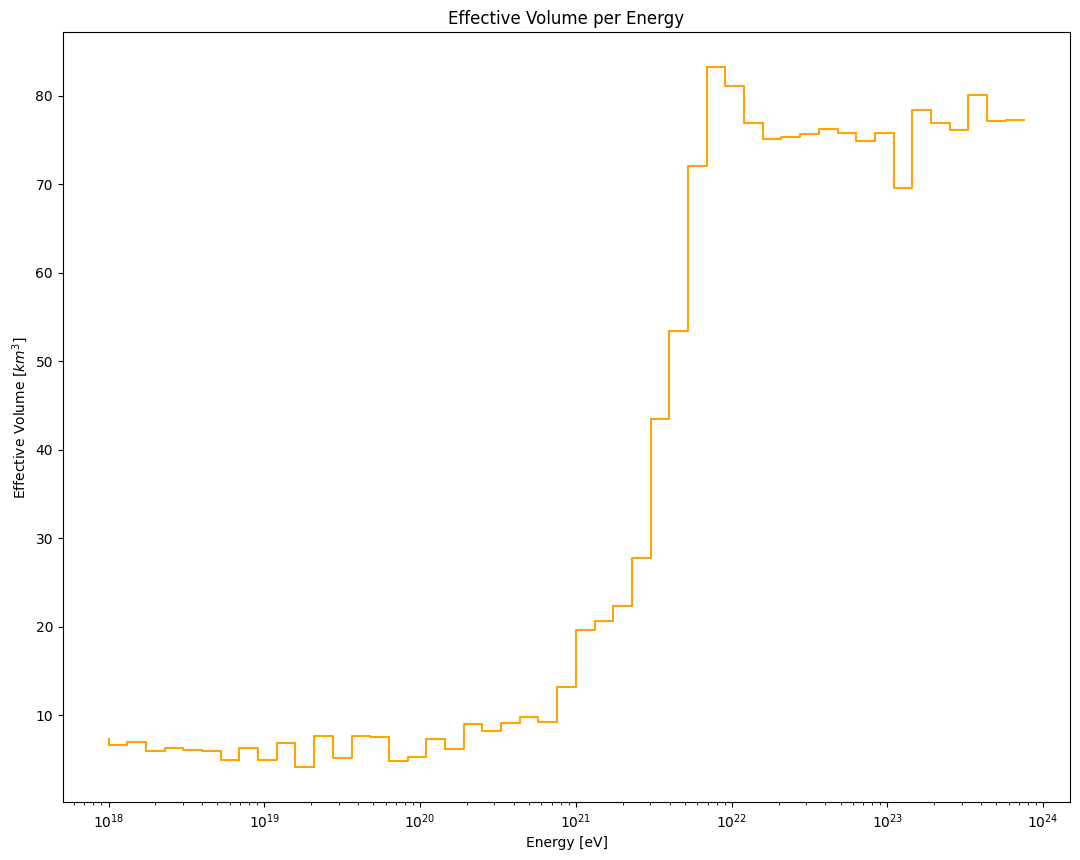

In [26]:
log_min_energy = 18
log_max_energy = 24

# Filter out the energy values that have been detected so have flag ==1
detected_energy_3 = [energy for energy, flag in zip(energy_3, flags_3) if flag == 1]

# Define the bin edges equally spaced in log space
log_bin_edges = np.linspace(log_min_energy, log_max_energy, 51)

# Transform the bin edges back to linear scale
linear_bin_edges = 10**log_bin_edges

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(energy_3, bins=linear_bin_edges, color='dodgerblue')
plt.hist(detected_energy_3, bins=linear_bin_edges, color='crimson')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()

###################################### Now try to calculate the effective volume ###############################################

# Calculate the histograms using numpy.histogram
hist_all_3, _ = np.histogram(energy_3, bins=linear_bin_edges)
hist_detected_3, _ = np.histogram(detected_energy_3, bins=linear_bin_edges)

# Ensure you avoid division by zero
division_result_3 = np.divide(hist_detected_3, hist_all_3, where=hist_all_3!=0)

# Calculate the generation volume which is a square
Rgen = 10                          # km
Hgen = 1                           # km
Vgen = (2 * Rgen)**2 * Hgen
print(f"The volume of the can volume is {round(Vgen)} km3.")

# Calculate the effective volume
Veff_3 = division_result_3 * Vgen

# Plot the Veff
plt.figure(figsize=(13, 10))
plt.step(linear_bin_edges[:-1], Veff_3, linestyle='-', color='orange')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Effective Volume [$km^3$]')
plt.title('Effective Volume per Energy')
plt.show()

## Cylindrical Detector

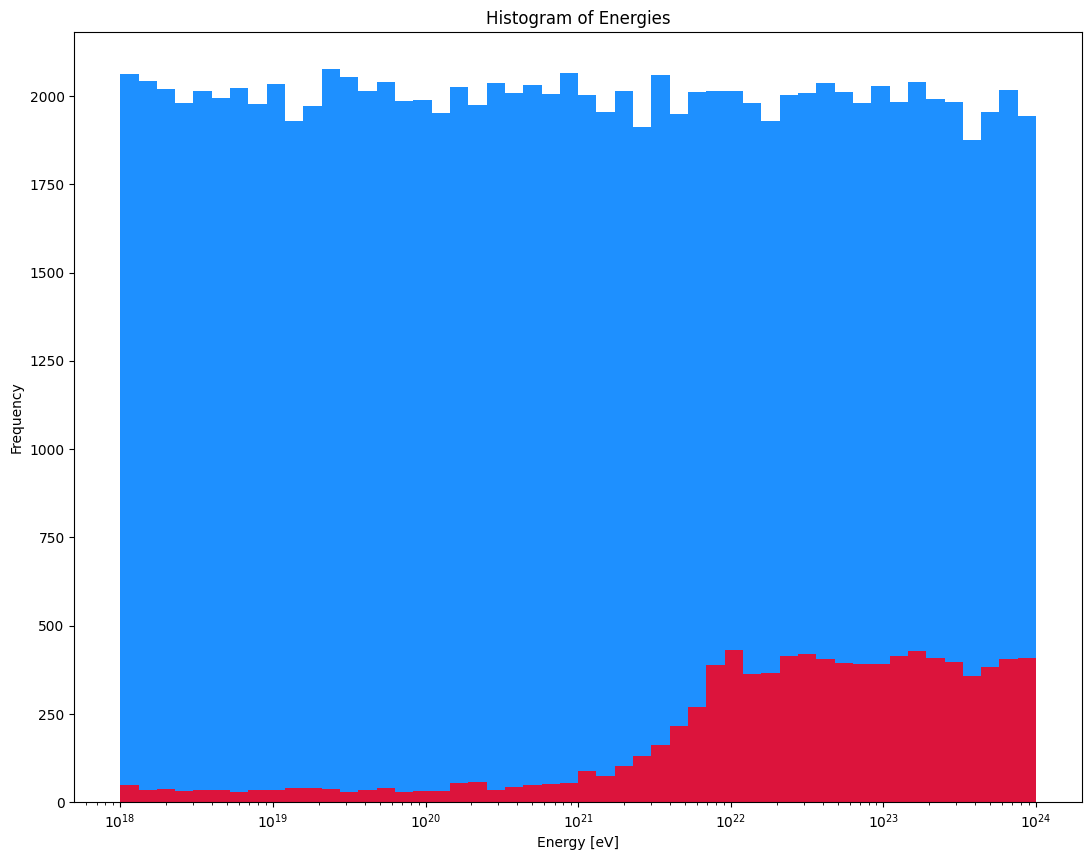

The volume of the can volume is 400 km3.


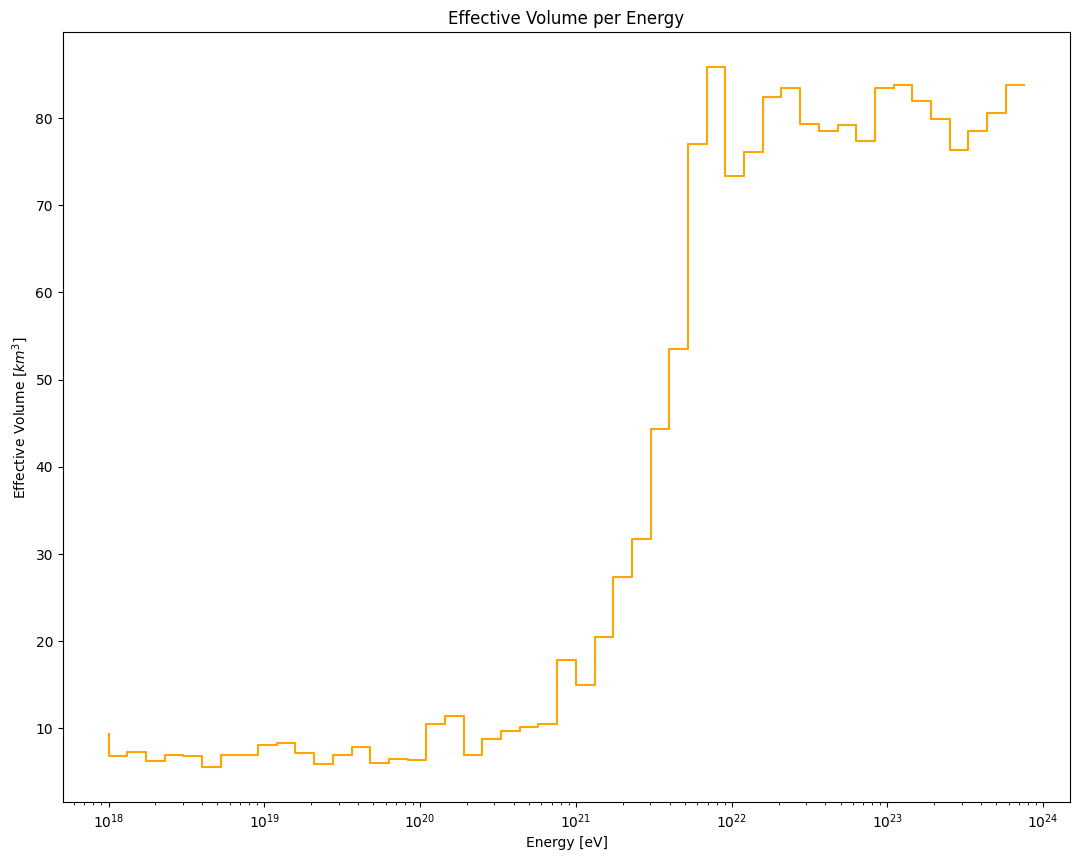

In [24]:
log_min_energy = 18
log_max_energy = 24

# Filter out the energy values that have been detected so have flag ==1
detected_energy_4 = [energy for energy, flag in zip(energy_4, flags_4) if flag == 1]

# Define the bin edges equally spaced in log space
log_bin_edges = np.linspace(log_min_energy, log_max_energy, 51)

# Transform the bin edges back to linear scale
linear_bin_edges = 10**log_bin_edges

# Plot the histogram
plt.figure(figsize=(13, 10))
plt.hist(energy_4, bins=linear_bin_edges, color='dodgerblue')
plt.hist(detected_energy_4, bins=linear_bin_edges, color='crimson')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Frequency')
plt.title('Histogram of Energies')
plt.show()

###################################### Now try to calculate the effective volume ###############################################

# Calculate the histograms using numpy.histogram
hist_all_4, _ = np.histogram(energy_4, bins=linear_bin_edges)
hist_detected_4, _ = np.histogram(detected_energy_4, bins=linear_bin_edges)

# Ensure you avoid division by zero
division_result_4 = np.divide(hist_detected_4, hist_all_4, where=hist_all_4!=0)

# Calculate the generation volume which is a square
Rgen = 10                          # km
Hgen = 1                           # km
Vgen = (2 * Rgen)**2 * Hgen
print(f"The volume of the can volume is {round(Vgen)} km3.")

# Calculate the effective volume
Veff_4 = division_result_4 * Vgen

# Plot the Veff
plt.figure(figsize=(13, 10))
plt.step(linear_bin_edges[:-1], Veff_4, linestyle='-', color='orange')
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Effective Volume [$km^3$]')
plt.title('Effective Volume per Energy')
plt.show()